### Analyysejä analysointiosaamisen tehtävään 2

In [3]:
# Kirjastojen tuonti
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Kaavioiden tyylimäärittely
sns.set_style('whitegrid')

# Datan avaaminen
df=pd.read_excel('https://taanila.fi/t2aineisto.xlsx')
df.head()

,Rahaston nimi,5 vuoden tuotto (% vuodessa),3 vuoden tuotto (% vuodessa),1 vuoden tuotto,6 kuukauden tuotto,Hallinn. ja säilytyspalkkio (% vuodessa),Rahastoluokka
0,Aktia Capital,0.078279,0.115738,-0.036693,0.059640,0.0183,EQ_FINLAND
1,Aktia Capital K,NaN,NaN,-0.030610,0.062844,0.0120,EQ_FINLAND
2,Aktia Capital L,NaN,NaN,-0.030557,0.062980,0.0120,EQ_FINLAND
3,Aktia Capital X,NaN,NaN,-0.028007,0.064354,0.0093,EQ_FINLAND
4,Aktia Mikro Markka A,0.100254,0.112111,-0.178529,0.026212,0.0120,EQ_FINLAND


In [4]:
df.columns

Index(['Rahaston nimi', '5 vuoden tuotto (% vuodessa)',
       '3 vuoden tuotto (% vuodessa)', '1 vuoden tuotto', '6 kuukauden tuotto',
       'Hallinn. ja säilytyspalkkio (% vuodessa)', 'Rahastoluokka'],
      dtype='object')

In [5]:
# Lyhyemmät nimet muuttujille
df.columns=['nimi', 'tuotto 5v', 'tuotto 3v', 'tuotto 1v', 'tuotto 6kk', 'palkkio', 'rahastoluokka']

In [6]:
# Rastojen lukumäärä rahastoluokittain
df['rahastoluokka'].value_counts()

EQ_EUROPE         127
EQ_NORAM           84
EQ_EMER_GLOBAL     63
EQ_FINLAND         37
Name: rahastoluokka, dtype: int64

In [7]:
#Tilastolliset tunnusluvut rahastoluokittain
df.groupby('rahastoluokka').describe().T

rahastoluokka     EQ_EMER_GLOBAL   EQ_EUROPE  EQ_FINLAND   EQ_NORAM
tuotto 5v  count       51.000000   95.000000   28.000000  61.000000
           mean         0.003515    0.046383    0.075395   0.104408
           std          0.030669    0.031582    0.015257   0.027197
           min         -0.077544   -0.048700    0.046835  -0.011155
           25%         -0.010721    0.028627    0.063975   0.091445
           50%          0.004493    0.048799    0.072156   0.112288
           75%          0.018885    0.064493    0.090846   0.118723
           max          0.097260    0.121303    0.100254   0.158493
tuotto 3v  count       55.000000  104.000000   34.000000  67.000000
           mean         0.015021    0.071777    0.102347   0.117538
           std          0.053964    0.042658    0.018647   0.034426
           min         -0.089175   -0.054107    0.053388   0.005624
           25%         -0.009078    0.053277    0.095435   0.112150
           50%          0.008007    0.080373    0.101550   0.125171
           75%          0.041809    0.095352    0.114765   0.139200
           max          0.233018    0.245966    0.139902   0.203556
tuotto 1v  count       58.000000  121.000000   37.000000  78.000000
           mean        -0.101586   -0.010681   -0.005949  -0.025834
           std          0.048808    0.096004    0.070168   0.051145
           min         -0.193768   -0.252102   -0.188042  -0.140012
           25%         -0.128846   -0.045647   -0.030557  -0.051267
           50%         -0.108501    0.017303    0.020571  -0.036483
           75%         -0.081641    0.054538    0.033830   0.002949
           max          0.026586    0.155428    0.082694   0.136808
tuotto 6kk count       61.000000  125.000000   37.000000  78.000000
           mean        -0.046805    0.092900    0.060595  -0.038001
           std          0.043481    0.058049    0.027534   0.035104
           min         -0.100237   -0.048776   -0.039379  -0.121275
           25%         -0.072873    0.057319    0.054246  -0.058191
           50%         -0.059365    0.100355    0.063153  -0.043846
           75%         -0.029659    0.123136    0.072106  -0.021770
           max          0.126804    0.271478    0.112876   0.058433
palkkio    count       63.000000  127.000000   37.000000  84.000000
           mean         0.014417    0.011554    0.011693   0.010906
           std          0.007038    0.005855    0.006072   0.006210
           min          0.000000    0.000000    0.001590   0.000000
           25%          0.008250    0.007500    0.006200   0.004975
           50%          0.015000    0.011600    0.012000   0.010000
           75%          0.019000    0.017000    0.017000   0.016000
           max          0.025000    0.020000    0.020000   0.020000

<Axes: xlabel='rahastoluokka', ylabel='tuotto 5v'>

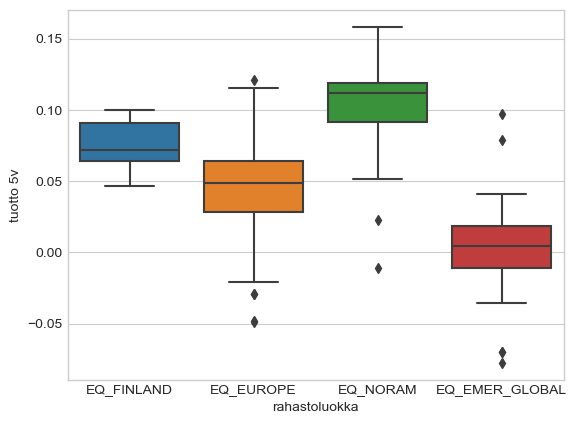

In [8]:
sns.boxplot(x='rahastoluokka', y='tuotto 5v', data=df)

<Axes: xlabel='rahastoluokka', ylabel='tuotto 3v'>

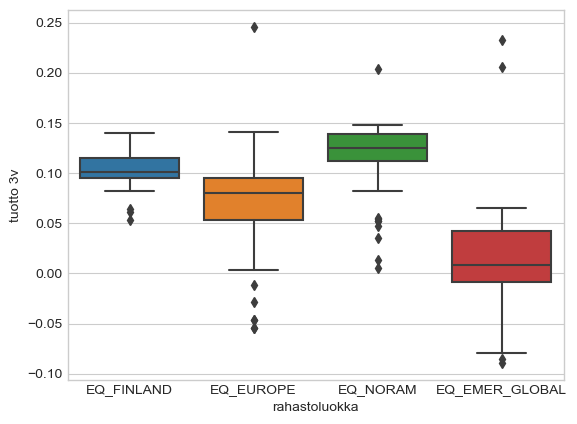

In [9]:
sns.boxplot(x='rahastoluokka', y='tuotto 3v', data=df)

<Axes: xlabel='rahastoluokka', ylabel='tuotto 1v'>

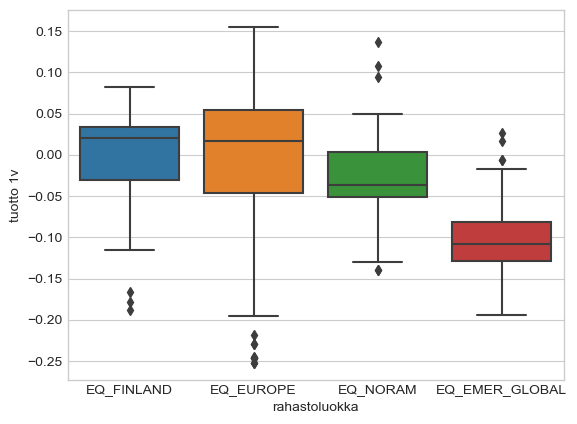

In [10]:
sns.boxplot(x='rahastoluokka', y='tuotto 1v', data=df)

<Axes: xlabel='rahastoluokka', ylabel='tuotto 6kk'>

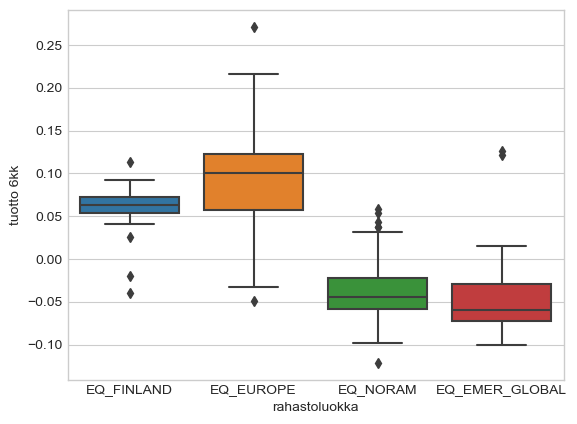

In [11]:
sns.boxplot(x='rahastoluokka', y='tuotto 6kk', data=df)

<Axes: xlabel='rahastoluokka', ylabel='palkkio'>

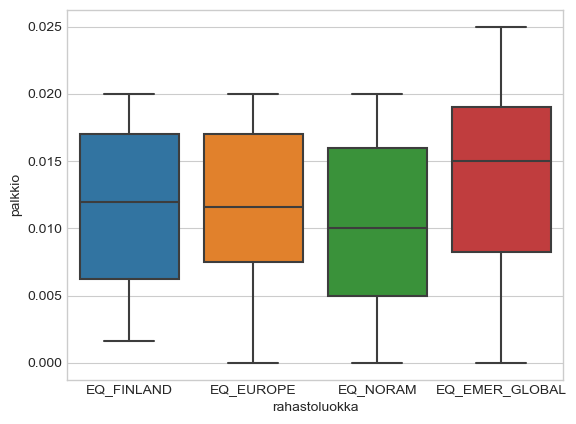

In [12]:
sns.boxplot(x='rahastoluokka', y='palkkio', data=df)

In [13]:
# Korrelaatiokertoimen 1v tuoton ja palkkion välille rahastoluokittain
df.groupby('rahastoluokka')[['tuotto 1v','palkkio']].corr()

tuotto 1v   palkkio
rahastoluokka                                
EQ_EMER_GLOBAL tuotto 1v   1.000000  0.182163
               palkkio     0.182163  1.000000
EQ_EUROPE      tuotto 1v   1.000000 -0.228784
               palkkio    -0.228784  1.000000
EQ_FINLAND     tuotto 1v   1.000000 -0.514804
               palkkio    -0.514804  1.000000
EQ_NORAM       tuotto 1v   1.000000 -0.033133
               palkkio    -0.033133  1.000000

In [14]:
# pearsonr-funktion tuonti scipy.stats-kirjastosta
from scipy.stats import pearsonr

# Korrelaatiokertoimet ja p-arvot 1v tuoton ja palkkion välille rahastoluokittain
for luokka in pd.unique(df['rahastoluokka']):
    df_dropna = df[df['rahastoluokka']==luokka].dropna(subset=['tuotto 1v', 'palkkio'])
    corr, p = pearsonr(df_dropna['tuotto 1v'], df_dropna['palkkio'])
    print(luokka, 'korrelaatio %.3f,' %corr, 'p-arvo %.4f' %p)

EQ_FINLAND korrelaatio -0.515, p-arvo 0.0011
EQ_EUROPE korrelaatio -0.229, p-arvo 0.0116
EQ_NORAM korrelaatio -0.033, p-arvo 0.7734
EQ_EMER_GLOBAL korrelaatio 0.182, p-arvo 0.1711


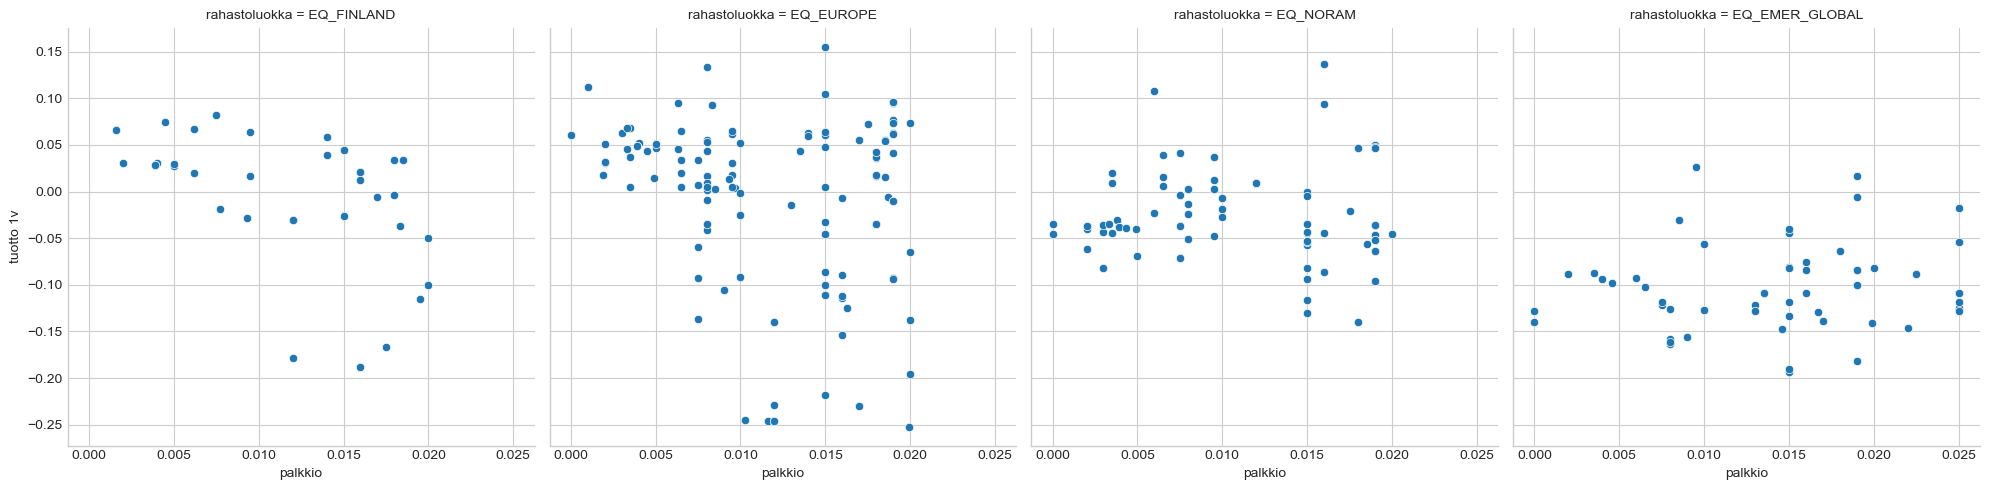

In [15]:
sns.relplot(x='palkkio', y='tuotto 1v', col='rahastoluokka', data=df, kind='scatter')